<a href="https://colab.research.google.com/github/Francisco2963/PCA-2/blob/main/PCA_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducción de dimensionalidad / PCA 2 (Core)

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [129]:
df.duplicated().sum()

0

In [130]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [131]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [133]:
def calcular_outliers(df, columna):
  if df[columna].dtype == 'object':
    return None, None, None, None
  else:

   Q1 = df[columna].quantile(0.25)
   Q3 = df[columna].quantile(0.75)
   IQR = Q3 - Q1
   outliers = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
   return outliers, Q1, Q3, IQR

outliers_Id, Q1_Id, Q3_Id, IQR_Id = calcular_outliers(df, 'Id')
outliers_SepalLengthCm, Q1_SepalLengthCm, Q3_SepalLengthCm, IQR_SepalLengthCm = calcular_outliers(df, 'SepalLengthCm')
outliers_SepalWidthCm, Q1_SepalWidthCm, Q3_SepalWidthCm, IQR_SepalWidthCm = calcular_outliers(df, 'SepalWidthCm')
outliers_PetalLengthCm, Q1_PetalLengthCm, Q3_PetalLengthCm, IQR_PetalLengthCm = calcular_outliers(df, 'PetalLengthCm')
outliers_PetalWidthCm, Q1_PetalWidthCm, Q3_PetalWidthCm, IQR_PetalWidthCm = calcular_outliers(df, 'PetalWidthCm')


print(f'Outliers en Id: \n{len(outliers_Id)}')

print(f'Outliers en SepalLengthCm: \n{len(outliers_SepalLengthCm)}')

print(f'Outliers en SepalWidthCm: \n{len(outliers_SepalWidthCm)}')

print(f'Outliers en PetalLengthCm: \n{len(outliers_PetalLengthCm)}')

print(f'Outliers en PetalWidthCm: \n{len(outliers_PetalWidthCm)}')




Outliers en Id: 
0
Outliers en SepalLengthCm: 
0
Outliers en SepalWidthCm: 
4
Outliers en PetalLengthCm: 
0
Outliers en PetalWidthCm: 
0


In [134]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Text(0.5, 0, 'PetalWidthCm')

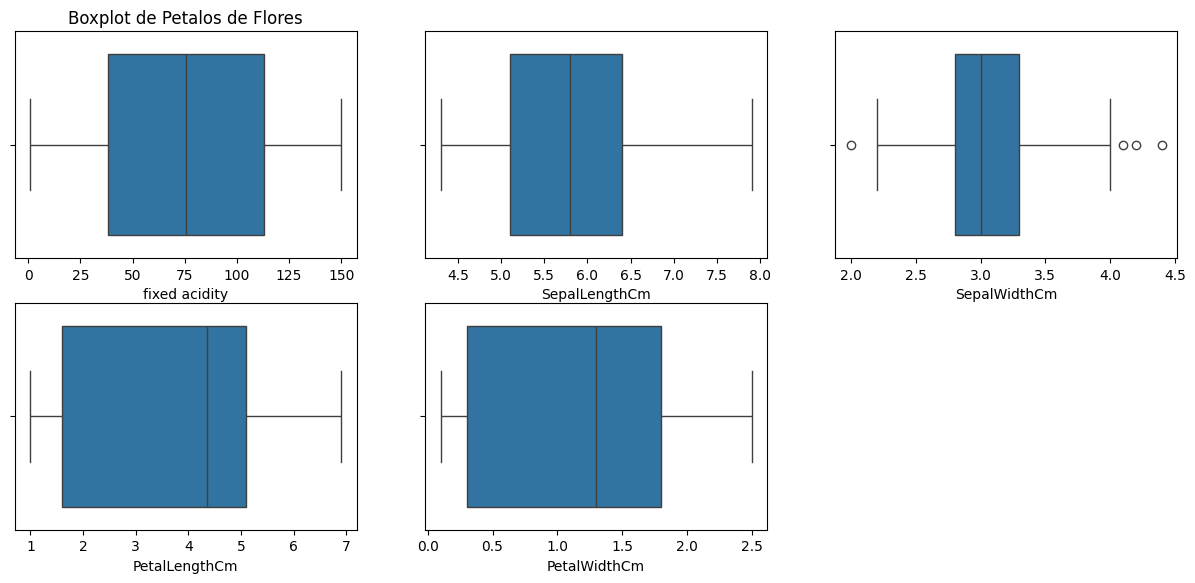

In [135]:
plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
sns.boxplot(x=df['Id'])
plt.title('Boxplot de Petalos de Flores')
plt.xlabel('fixed acidity')

plt.subplot(3,3,2)
sns.boxplot(x=df['SepalLengthCm'])
plt.xlabel('SepalLengthCm')

plt.subplot(3,3,3)
sns.boxplot(x=df['SepalWidthCm'])
plt.xlabel('SepalWidthCm')

plt.subplot(3,3,4)
sns.boxplot(x=df['PetalLengthCm'])
plt.xlabel('PetalLengthCm')

plt.subplot(3,3,5)
sns.boxplot(x=df['PetalWidthCm'])
plt.xlabel('PetalWidthCm')

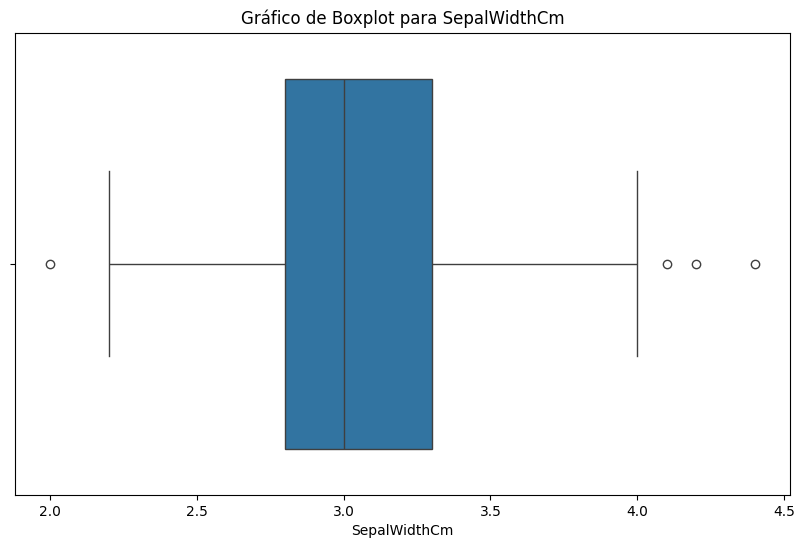

In [136]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='SepalWidthCm', data=df)
plt.title('Gráfico de Boxplot para SepalWidthCm')

plt.show()

In [137]:
# Calcular los cuartiles
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df[(df['SepalWidthCm'] < lower_bound) | (df['SepalWidthCm'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
outliers

Outliers:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


# PREPROCESAMIENTO

In [138]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 4.3 MB/s eta 0:00:00


In [139]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [141]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [142]:
y = df['Species']
X = df.drop(['Species'], axis = 1)

In [143]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [144]:
label = LabelEncoder()
y = label.fit_transform(y)

# PCA

In [145]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [153]:
# Aplicar PCA para exploracion de los datos
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

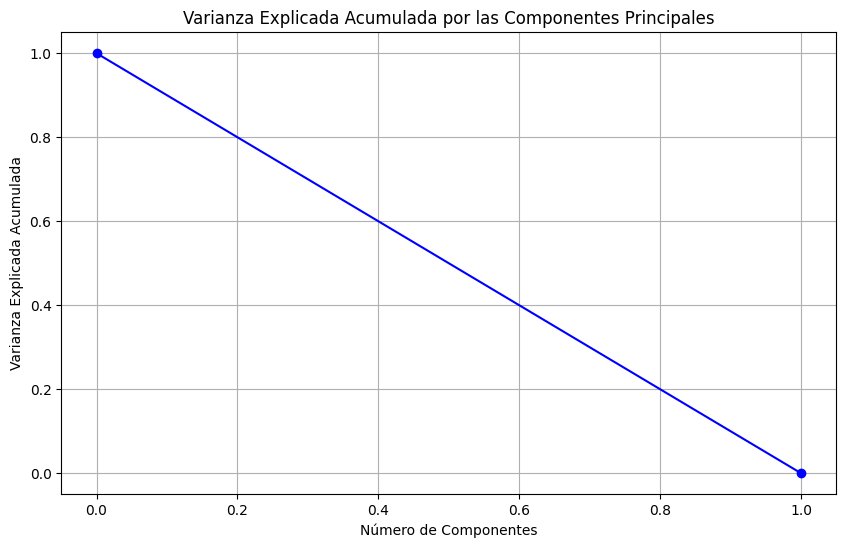

In [154]:
# Verificar la varianza explicada por PCA
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_,'bo-')
#plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.title("Varianza Explicada Acumulada por las Componentes Principales")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.grid()
plt.show()

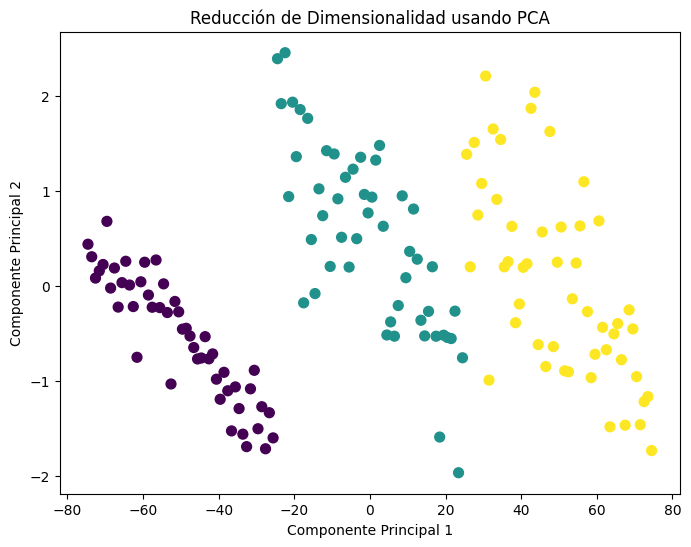

In [155]:
# Visualización de PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("Reducción de Dimensionalidad usando PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [165]:
# Aplicacion de PCA para enrenar un modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)


In [166]:
# Instanciar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

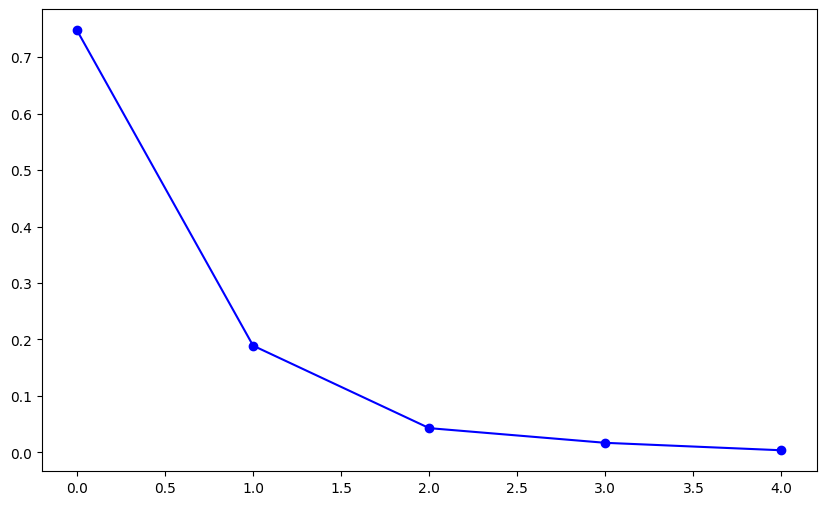

In [167]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10,6))
plt.plot(pca.explained_variance_ratio_,'bo-')
plt.show()

In [168]:
pca.n_features_in_

5

In [169]:
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train)

print("El número de componentes es", pca.n_components_, "de", pca.n_features_in_)

El número de componentes es 2 de 5


In [172]:
pca.components_

array([[ 0.48508359,  0.45640609, -0.20532333,  0.51155757,  0.50253216],
       [-0.02683487,  0.34340954,  0.93605758,  0.03140765,  0.06449454]])

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

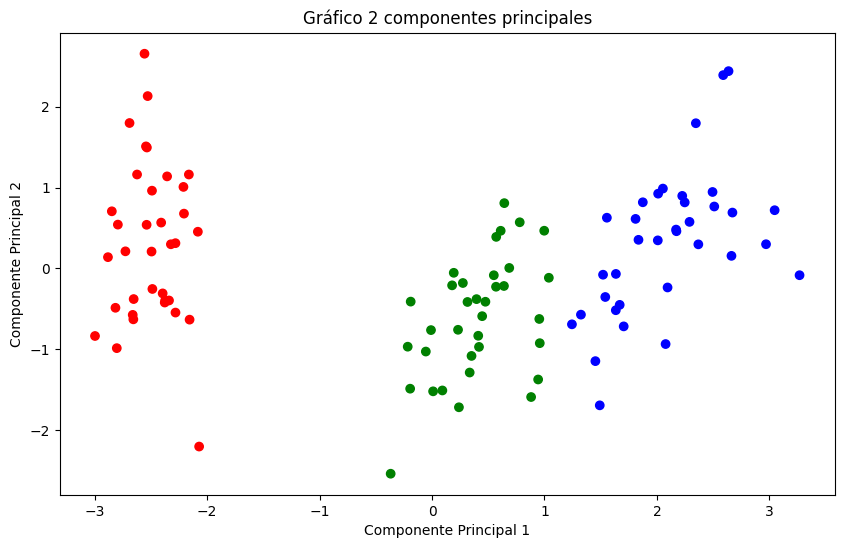

In [173]:
# Convertir y_train a pandas Series para usar map
y_train_series = pd.Series(y_train)

# Mapeo de colores para todas las clases (0, 1, 2, 3, 4, 5)
colors = {0: 'red', 1: 'green', 2: 'blue'}
color_map = y_train_series.map(colors)

# Filtrar los registros donde el color_map no es NaN (en caso de que existan valores no mapeados)
mask = color_map.notna()
filtered_X_train_pca = X_train_pca[mask]
filtered_color_map = color_map[mask]

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(filtered_X_train_pca[:, 0], filtered_X_train_pca[:, 1], c=filtered_color_map)
plt.title('Gráfico 2 componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# COMENTARIO FINAL

Interpretación para los gráficos:

En la primera gráfica, la Componente Principal 1 parece separar bien las clases, indicando que alguna combinación de características (probablemente Petal Length y Sepal Length) son importantes.

La Componente Principal 2 ayuda a diferenciar las tres especies de forma vertical, lo que sugiere que el ancho del sépalo y el pétalo son relevantes para discriminar entre especies.

2. ¿PCA es Capaz de Separar Correctamente las Clases?
Sí, PCA logra separar razonablemente bien las clases en ambos gráficos. Podemos observar que:

Visualización de los Datos Completos (Primer Gráfico):

Las tres especies están separadas claramente con poco solapamiento, especialmente en la dimensión del primer componente principal.

La separación a lo largo de la Componente Principal 1 sugiere que al menos una característica (por ejemplo, el largo del pétalo) es útil para distinguir las tres especies.


Visualización de los Datos de Entrenamiento (Segundo Gráfico):

Se observa una separación similar entre las tres clases.
Aunque hay menos puntos (debido a la división en X_train y X_test), la estructura general de la distribución se mantiene.

Esto indica que la reducción de dimensionalidad con PCA preserva la mayoría de la información relevante de las características originales, permitiendo una buena separación de clases.


Conclusión

PCA es útil para separar las clases en este dataset porque las características originales están correlacionadas de manera que permiten a las componentes principales capturar la varianza significativa para distinguir las especies. Este análisis ayuda a comprender qué características son relevantes para la clasificación y cómo se relacionan entre sí, proporcionando una visión más clara de las diferencias entre las especies de Iris